### **TEMG 4940C - Machine Learning Assignment Guideline**

---



This document provides a guideline for completing a machine learning assignment. The assignment consists of 6 part, each corresponding to each steps with reference to Tutorial’s PPT:

*Remarks: There are no restrictions in terms of what specific libraries or programming language to use, so feel free to be creative or search online for inspirations.*


---





#### **Submission Criteria**
Your submission should include the following:
1. A public git repository with your machine learning code and a brief README file describing how to run it.
   
   a. README file should include the version of python & common libraries used during the development
   
   b. You are **STRONGLY RECOMMENDED** to comment your code, both for readability & to develop good collaboration habits in dev
   
   
2. A link to your deployed dashboard (if hosted)

---



**Name**: Lam Leung Kin, Kurtis

**Student ID**: 20862105

#### **Dataset Introduction**
Customer personality analysis is a thorough examination of a company's ideal clients. It makes it simpler for businesses to adapt products in response to the unique wants, habits, and concerns of various consumer types.

Consumer personality analysis aids a corporation in tailoring its offering to its target market from various consumer categories. For instance, a firm can assess which customer segment is most likely to purchase the product and then promote the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the database of the company.


---

**Attributes:**

*Part 1. People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


*Part 2. Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


*Part 3.Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


*Part 4. Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

-------
**Ultimate Goal:**

With the Datasets aforementioned, evaluated the likelihood that customer would accepted offers in Marketing Campaign

**[Prediction Value]: Y =AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response**

#### **Step 0. Loading the Data from File Path**
- Download the dataset from Canvas
- Undergo Preliminary Analysis



In [10]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd

In [3]:
#Loading the Dataset

from google.colab import drive # Load data from google drive
drive.mount("/content/drive")

%cd "/content/drive/My Drive/Colab_Notebooks/ML_W0_TEMG4940C"

data = pd.read_csv("TEMG4940C - Assignment Dataset.csv", sep="\t")
print("Number of datapoints:", len(data)) # Show number of Data Rows in Dataset
data.iloc[:, :20].head(5) # Print Top 5 Rows of the dataset for preview

Mounted at /content/drive
/content/drive/My Drive/Colab_Notebooks/ML_W0_TEMG4940C
Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5


In [4]:
#Information on features
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
#@title Q0. Generate Y - Predictor Value
## Before Proceeding, You may want to evaluate the Y -Predictor Value first
## By combining Y = AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response

# Columns: 0:20 = id:NumWebVisitsMonth, 20:26 = AcceptedCmp1:AcceptedCmp5

Response = data.pop('Response')
data.insert(25, 'Response', Response) # Reorder the columns so that the predictive value is easier to extract

data_classes = data.iloc[:, 20:26]
y = data.iloc[:, 20:26].sum(axis = 1).rename('y')

data = data.drop(data_classes.columns.tolist(), axis=1)
data = pd.concat([data, y], axis = 1)

# Reorder the Complain so that data-analysis is easier to perform
Complain = data.pop("Complain")
data.insert(9, "Complain", Complain)

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Complain             2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,y
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,...,88,88,3,8,10,4,7,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,...,1,6,2,1,1,2,5,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,...,21,42,1,8,2,10,4,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,...,3,5,2,2,0,4,6,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,...,27,15,5,5,3,6,5,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,0,...,42,14,2,6,4,10,6,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,0,...,49,27,4,7,3,7,6,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,0,...,1,23,2,4,0,4,8,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,0,...,3,2,1,3,0,2,9,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,0,...,1,13,1,1,0,0,20,3,11,1


#### **Step 1. Exploratory Data Analysis**
In this step, you shall explore the data set and perform some descriptive statistics and visualizations to understand the data better. You shall also identify any potential problems or issues with the data, such as missing values, outliers, or imbalances.




In [6]:
#@title Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

# Q1a. Showcase existence of missing value, outliers & imbalances within dataset
import plotly.express as px

## Check Missing Value
print(f"Total Count of Missing Value:\n{data.isnull().sum ()}")
# Ans: All 0 except Income: 25

## Check Outliers
data_features = data.columns.tolist()
num_outliers = 0

for x in data_features[0:20]: # [20:] is predictive value or helper data
  if data[x].dtype == object: # check if column is non-numeric
    continue
  q75 = np.nanpercentile(data.loc[:, x], 75)
  q25 = np.nanpercentile(data.loc[:, x], 25)
  intr_qr = q75 - q25

  max = q75 + (1.5 * intr_qr)
  min = q25 - (1.5 * intr_qr)

  num_outliers += len(data[(data[x] < min) | (data[x] > max)])

print("Number of outliers:", num_outliers)
# Ans: 1247

Total Count of Missing Value:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Complain                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Z_CostContact           0
Z_Revenue               0
y                       0
dtype: int64
Number of outliers: 1260


In [7]:
#@title Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.
# Q1b. Codes to handle (i) Missing Values, (ii) Outliers
# Tips: You may refer to Slide 19 in Tutorial PPT

# (i) Missing Value
# 1st method, filled with feature mean
# data = data.fillna(data.mean())

# 2nd method, filled with feature mean belonging to the same class

class_groups = data.groupby('y')

means = class_groups["Income"].transform('mean')
print(means)
data["Income"] = data["Income"].fillna(means)

# (ii) Outliers
# 1st method, Quartile Bound
for x in data_features[0:20]: # [20:] is predictive value or helper data
  if data[x].dtype == object: # check if column is non-numeric
    continue
  q75 = data[x].quantile(0.75)
  q25 = data[x].quantile(0.25)
  intr_qr = q75 - q25

  max = q75 + (1.5 * intr_qr)
  min = q25 - (1.5 * intr_qr)

  data.loc[data[x] < min, x] = np.nan
  data.loc[data[x] > max, x] = np.nan

data = data.dropna()

# 2nd method, Feature Clipping
data.info()
data.describe()

0       56823.373984
1       48676.844196
2       48676.844196
3       48676.844196
4       48676.844196
            ...     
2235    48676.844196
2236    56823.373984
2237    56823.373984
2238    48676.844196
2239    56823.373984
Name: Income, Length: 2240, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 1 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1523 non-null   float64
 1   Year_Birth           1523 non-null   float64
 2   Education            1523 non-null   object 
 3   Marital_Status       1523 non-null   object 
 4   Income               1523 non-null   float64
 5   Kidhome              1523 non-null   float64
 6   Teenhome             1523 non-null   float64
 7   Dt_Customer          1523 non-null   object 
 8   Recency              1523 non-null   float64
 9   Complain             1523 non-null   float64
 10  MntWines      

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,y
count,1523.00000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.0,1523.000000,1523.000000,1523.000000,...,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.0,1523.0,1523.000000
mean,5597.12738,1969.383454,43477.777113,0.569928,0.558766,49.038083,0.0,189.521339,10.371635,70.298096,...,10.451740,24.068286,2.257387,3.369665,1.502298,4.785292,5.956008,3.0,11.0,0.290873
std,3257.53882,11.287489,17222.708858,0.544536,0.543442,29.060969,0.0,266.838908,15.684338,100.856036,...,15.696388,25.715374,1.370590,2.448266,1.948203,2.789693,2.040016,0.0,0.0,0.664544
min,1.00000,1940.000000,3502.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2809.00000,1960.000000,30552.500000,0.000000,0.000000,24.000000,0.0,13.000000,1.000000,11.000000,...,1.000000,6.000000,1.000000,1.000000,0.000000,3.000000,5.000000,3.0,11.0,0.000000
50%,5510.00000,1971.000000,42386.000000,1.000000,1.000000,49.000000,0.0,54.000000,4.000000,26.000000,...,4.000000,15.000000,2.000000,3.000000,1.000000,4.000000,6.000000,3.0,11.0,0.000000
75%,8417.00000,1977.000000,55603.500000,1.000000,1.000000,74.500000,0.0,254.000000,12.000000,84.500000,...,13.000000,34.000000,3.000000,5.000000,2.000000,6.000000,7.000000,3.0,11.0,0.000000
max,11191.00000,1996.000000,90933.000000,2.000000,2.000000,99.000000,0.0,1218.000000,81.000000,545.000000,...,81.000000,126.000000,6.000000,11.000000,10.000000,13.000000,20.000000,3.0,11.0,5.000000


> Q1c. Explain why the above methodology to handle the missing values and outliers is chosen

**Answer:**

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | MinMax-Clipper | Higher Accuracy |
|Handling Missing Values| Feature Mean | Higher Accuracy |


<ipython-input-8-50d43bc0ebb0>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


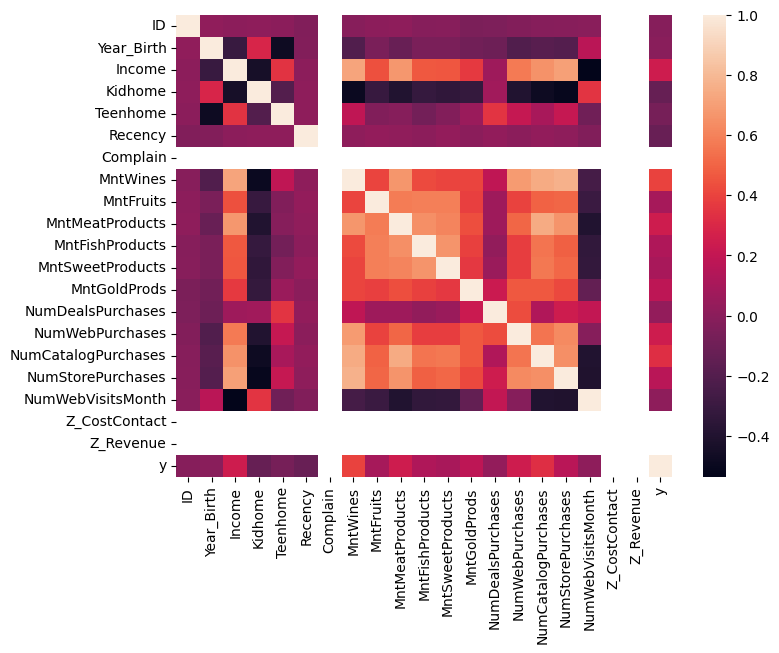

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,y
count,1523.00000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.0,1523.000000,1523.000000,1523.000000,...,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.0,1523.0,1523.000000
mean,5597.12738,1969.383454,43477.777113,0.569928,0.558766,49.038083,0.0,189.521339,10.371635,70.298096,...,10.451740,24.068286,2.257387,3.369665,1.502298,4.785292,5.956008,3.0,11.0,0.290873
std,3257.53882,11.287489,17222.708858,0.544536,0.543442,29.060969,0.0,266.838908,15.684338,100.856036,...,15.696388,25.715374,1.370590,2.448266,1.948203,2.789693,2.040016,0.0,0.0,0.664544
min,1.00000,1940.000000,3502.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2809.00000,1960.000000,30552.500000,0.000000,0.000000,24.000000,0.0,13.000000,1.000000,11.000000,...,1.000000,6.000000,1.000000,1.000000,0.000000,3.000000,5.000000,3.0,11.0,0.000000
50%,5510.00000,1971.000000,42386.000000,1.000000,1.000000,49.000000,0.0,54.000000,4.000000,26.000000,...,4.000000,15.000000,2.000000,3.000000,1.000000,4.000000,6.000000,3.0,11.0,0.000000
75%,8417.00000,1977.000000,55603.500000,1.000000,1.000000,74.500000,0.0,254.000000,12.000000,84.500000,...,13.000000,34.000000,3.000000,5.000000,2.000000,6.000000,7.000000,3.0,11.0,0.000000
max,11191.00000,1996.000000,90933.000000,2.000000,2.000000,99.000000,0.0,1218.000000,81.000000,545.000000,...,81.000000,126.000000,6.000000,11.000000,10.000000,13.000000,20.000000,3.0,11.0,5.000000


In [8]:
#@title Q1d. Plot 3 or more types of charts over all columns of data
# Q1d. Exploratory Data Analysis Graph Plotting

# import xxx as xxx (Import Graphing Libraries)
import plotly.graph_objects as go
import seaborn as sn
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots



# Analyze data with Correlation Matrix
def analyze_with_Corr(data):
  corr_matrix = data.corr()
  plt.figure(figsize=(8, 6))
  sn.heatmap(corr_matrix)
  plt.show()

def analyze_features(data):
  # Create subplots
  fig = make_subplots(rows = data.shape[1] // 3, cols = 3, subplot_titles = data.columns.tolist())
  r = 0 # rowIndex
  c = 0 # colIndex
  for i, col in enumerate(data.columns):
    c = i % 3 + 1
    if (c == 1):
      r += 1
    if (i < 10): # Analyze data in People category by Bar chart
      if (type(data[col]) == object):
        fig = go.Bar(x=data[col].value_counts().index, y=data[col].value_counts().values)
      else:
        fig = go.Histogram(x=data[col])
    else: # Analyze data in Product category with Income by Scatter plot
      fig = go.Scatter(x=data['Income'], y=data[col], mode='markers')

    fig = go.Figure(fig)
    fig.show()

  # fig.update_layout(title="EDA",
  #                   height=1500, width=1300,
  #                   showlegend=False,
  #                   xaxis_title="Value",
  #                   yaxis_title="Count")
  # fig.show()  # Show the plot



# Analyze data which are Predictive value
def analyze_classes(data):
  class_fig = px.pie(data, values = 'y', names = 'y',
              title='Distribution among different Classes',)
  class_fig.show()

analyze_with_Corr(data)
analyze_features(data.loc[:, "ID":"NumWebVisitsMonth"])
analyze_classes(data['y'])

data.describe()

> Q1e. Describe 3 observed patterns/ anomalies, and explain how would you plan/change your approach in upcoming data preparation/modeling based on the observations

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | Distribution of Education and Marital Status are right Skewed | preproces them with x = logx to balance the distribution
| Pattern 2 | Data in Products Category are highly correlated with each other| maybe combine them into one feature to reduce dimension |
| Pattern 3 | Class Imbalance appears as 5 only has 3% but others are around 16% | Use Data Balancing to to reduce bias due to this imbalance|




--------



#### **Step 2. Data Preparation**
In this step, you will prepare the data for modeling by applying appropriate techniques such as data cleaning, feature engineering, feature selection, and data transformation. You will also split the data into training and testing sets.

> Q2a. Identify Data Type of Each Column & Respective Data Preprocessing Methods
- **Type:** Nominal | Ordinal | Discrete | Continuous
- **Data Preprocessing Method:** One Hot Encoding | Rank Replacement | Normalization | Missing Data | Outlier | Feature Engineer | Data Balancing

**Answer:**

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | Discrete | Feature Engineer |
Year_Birth         | Discrete | Normalizatoin |      
Education          | Nominal | One Hot Encoding |       
Marital_Status     | Nominal | One Hot Encoding |
Income             | Continuous | Normalizatoin |      
Kidhome            | Ordinal | Normalizatoin |        
Teenhome           | Ordinal | Normalizatoin |   
Dt_Customer        | Ordinal | Feature Engineer |      
Recency            | Discrete | Feature Engineer |     
MntWines           | Discrete | Normalizatoin |    
MntFruits          | Discrete | Normalizatoin |    
MntMeatProducts    | Discrete | Normalizatoin |     
MntFishProducts    | Discrete | Normalizatoin |    
MntSweetProducts   | Discrete | Normalizatoin |    
MntGoldProds       | Discrete | Normalizatoin |
NumDealsPurchases  | Discrete | Normalizatoin |  
NumWebPurchases    | Discrete | Normalizatoin |
NumCatalogPurchases| Discrete | Normalizatoin |
NumStorePurchases  | Discrete | Normalizatoin |  
NumWebVisitsMonth  | Discrete | Normalizatoin |  
AcceptedCmp3       | Norminal | Data Balancing |  
AcceptedCmp4       | Norminal | Data Balancing |       
AcceptedCmp5       | Norminal | Data Balancing |       
AcceptedCmp1       | Norminal | Data Balancing |       
AcceptedCmp2       | Norminal | Data Balancing |       
Complain           | Norminal | Feature Engineer |       
Z_CostContact      | Continuous | Feature Engineer |     
Z_Revenue          | Continuous | Feature Engineer |          
Response           | Norminal | Data Balancing |

In [9]:
#@title Q2b. Perform the aforementioned Data Preprocessings
# Q2b. Preform Data Preprocessing

# import xxx as xxx (Import panda Libraries)
# from sklearn.preprocessing import xxx (Import sklearn libraries)
# ....
#
from sklearn.decomposition import PCA

# TODO:
# 1. Try different Normalization Method, Start with Min-Max Scalar
# 2. Deal with Class Imbalance

# Feature Selection of ID and Recency
if 'ID' and 'Recency' and 'Complain' and 'Z_Revenue' and 'Z_CostContact' in data:
  data = data.drop(columns=['ID', 'Recency', 'Complain', 'Z_Revenue', 'Z_CostContact'])

# Data Preprocessings on Features
for i, col in enumerate(data.loc[:, "Year_Birth":"NumWebVisitsMonth"].columns):
  # Categorical Data
  if (data[col].dtype == object):
    # Bucket Dt_Customer which is a datetime object into categories: year, month, day of week
    if (col == "Dt_Customer"):
      # print(col)
      Dt_Customer = data.pop(col)
      Dt_Customer = pd.to_datetime(Dt_Customer, format='%d-%m-%Y')
      Dt_Customer_Bucket = pd.DataFrame({
        'Dt_Customer_year': Dt_Customer.dt.year,
        'Dt_Customer_month': Dt_Customer.dt.month,
        'Dt_Customer_day_of_week': Dt_Customer.dt.day,
      })
      for col in Dt_Customer_Bucket.columns:
        Dt_Customer_Bucket[col] = (Dt_Customer_Bucket[col] - Dt_Customer_Bucket[col].min())/(Dt_Customer_Bucket[col].max() - Dt_Customer_Bucket[col].min()) # perform Normalization: Min-Max Scalar

      data = pd.concat([data, Dt_Customer_Bucket], axis = 1)
    # perform One-Hot Encoding to other Categorical Data
    else:
      one_hot_encoded = pd.get_dummies(data[col], prefix = col)
      data = pd.concat([data, one_hot_encoded], axis=1)
      data = data.drop(col, axis=1)
  # Numerical Data
  else:
    # print(col)
    data[col] = (data[col] - data[col].min())/(data[col].max() - data[col].min()) # perform Normalization: Min-Max Scalar

# Data Preprocessing on Classes
print("After Data-Preprocessing")

# data.head(10)
data.info()

After Data-Preprocessing
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 1 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               1523 non-null   float64
 1   Income                   1523 non-null   float64
 2   Kidhome                  1523 non-null   float64
 3   Teenhome                 1523 non-null   float64
 4   MntWines                 1523 non-null   float64
 5   MntFruits                1523 non-null   float64
 6   MntMeatProducts          1523 non-null   float64
 7   MntFishProducts          1523 non-null   float64
 8   MntSweetProducts         1523 non-null   float64
 9   MntGoldProds             1523 non-null   float64
 10  NumDealsPurchases        1523 non-null   float64
 11  NumWebPurchases          1523 non-null   float64
 12  NumCatalogPurchases      1523 non-null   float64
 13  NumStorePurchases        1523 non-null   float64
 14 



---



#### **Step 3. Modeling**
In this step, you will choose and apply one or more machine learning algorithms to build predictive models using the training data.

In [11]:
#@title Q3a. Generate Test/Training Data Split
# Q3a. Generate Test / Training Data Split
from sklearn.model_selection import train_test_split

y = data['y']
x = data.drop('y', axis = 1)

# print("Not Transformed data shape:", data.shape)
# # Apply PCA to the iris dataset
# pca = PCA(n_components = 0.99)
# data = pca.fit_transform(x)

# # Print the transformed data
# print("Transformed data shape:", data.shape)
# x = pd.DataFrame(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

# x_train.info()
# y_train.info()

#Deal with Class Imbalance
from imblearn.over_sampling import SMOTE
# Step 4: Initialize SMOTE object
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)

# Step 5: Fit SMOTE object on training data
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Step 6: Concatenate original training data with synthetic samples generated by SMOTE
x_train_balanced = pd.concat([x_train, x_train_balanced], axis=0)
y_train_balanced = pd.concat([y_train, y_train_balanced], axis=0)

# analyze_features(x_train_balanced)
# analyze_classes(y_train_balanced)

In [20]:
#@title Q3b. Choose and deploy dataset to 3+ ML Model
# Q3b. Choose 3 models to deploy dataset to
# Tips: Do not afraid to test out various models, to find out which model fits the datasets the best

# Step 1. Import Model

# Model 1:
# LogisticRegression is a good baseline model. It can predict the probability of acceptance for each class independently.
# from sklearn.linear_model import LogisticRegression
# y_logReg_pred = np.zeros(y_test.shape)

# logReg = LogisticRegression(max_iter = 1000)

# logReg.fit(x_train_balanced, y_train_balanced)
# y_logReg_pred = logReg.predict(x_test)

# Model 2:
# Random Forest - Random Forests can naturally handle multi-label classification problems. They can output a probability for each class.

from sklearn.ensemble import RandomForestClassifier
def ranFor_model_train(model = RandomForestClassifier(n_estimators = 500, max_depth = 20)):
  y_ranFor_pred = np.zeros(y_test.shape)

  rf = model

  rf.fit(x_train_balanced, y_train_balanced)
  y_ranFor_pred = rf.predict(x_test)
  return y_ranFor_pred

# Model 3:
# Neural Network - A multi-layer perceptron (MLP) neural network is well suited for this problem. You can have separate output nodes for each class, and each node will output a probability between 0 and 1.
# from sklearn.neural_network import MLPClassifier
# y_mlp_pred = np.zeros(y_test.shape)

# mlp = MLPClassifier(hidden_layer_sizes=(14, 14,), max_iter = 1000)

# mlp.fit(x_train_balanced, y_train_balanced)

# y_mlp_pred = mlp.predict(x_test)



---



#### **Step 4. Evaluation**
In this step, you will evaluate the performance of the models using various metrics and techniques, such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, etc. You will also compare the results of different models and select the best one.


> Q4a. Evaluate the models accuracy by calculating / plotting the following
1. Confusion Matrix
2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
3. Plot the ROC Curve

In [13]:
#@title Q4a. Evaluate the Model's Accuracy

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_Model(y_pred):
  print("Model Performance: ", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  print("RanFor Confusion Matrix: ")
  ranFor_confusion_matrix = confusion_matrix(y_test, y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = ranFor_confusion_matrix)
  cm_display.plot()
  plt.show()

# evaluate_Model(y_logReg_pred)
# y_ranFor_pred = ranFor_model_train()
# evaluate_Model(y_ranFor_pred)
# evaluate_Model(y_mlp_pred)

> Q4b. After Evaluation, Please indicate which model would you eventually pursue & the underlying rationale

**Answer:**

I choose Model Random Forest due to two reasons. Firstly, it is ensembling model which helps dealing with the labels imbalance in the dataset. Secondly, the model is less computionally expensive than MLP whose performance is similar to it.



---



#### **Step 5. Optimization**
In this step, you will try to improve the performance of the best model by applying some advanced techniques such as hyperparameter tuning, K-fold Cross Validation, ensemble methods, etc.

In [14]:
#@title Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

# Step 1. Head to the library that you sourced your pre-trained models from, and look at what hyperparameters are available for tuning

# Step 2. Try and Test out various combinations to observe the minor differences hyper-parameter tuning makes

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ["sqrt", "log2", None]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 21, num = 10)]
class_weight = ["balanced", "balanced_subsample"]
criterion = ["gini", "entropy", "log_loss"]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'class_weight': class_weight,
               'criterion': criterion,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2', None], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_samples_leaf': [1, 3, 5, 7, 9, 12, 14, 16, 18, 21], 'class_weight': ['balanced', 'balanced_subsample'], 'criterion': ['gini', 'entropy', 'log_loss'], 'bootstrap': [True, False]}


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", lin

{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 900}
Model Performance:  0.819672131147541
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       247
           1       0.38      0.11      0.17        45
           2       0.33      0.10      0.15        10
           3       1.00      1.00      1.00         3

    accuracy                           0.82       305
   macro avg       0.64      0.55      0.56       305
weighted avg       0.76      0.82      0.77       305

RanFor Confusion Matrix: 


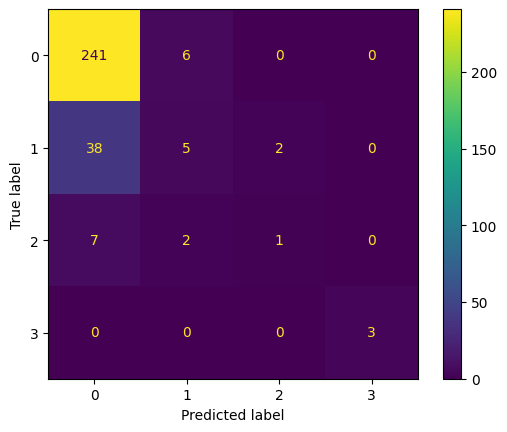

Model Performance:  0.819672131147541
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       247
           1       0.33      0.07      0.11        45
           2       0.33      0.10      0.15        10
           3       1.00      1.00      1.00         3

    accuracy                           0.82       305
   macro avg       0.63      0.54      0.54       305
weighted avg       0.75      0.82      0.76       305

RanFor Confusion Matrix: 


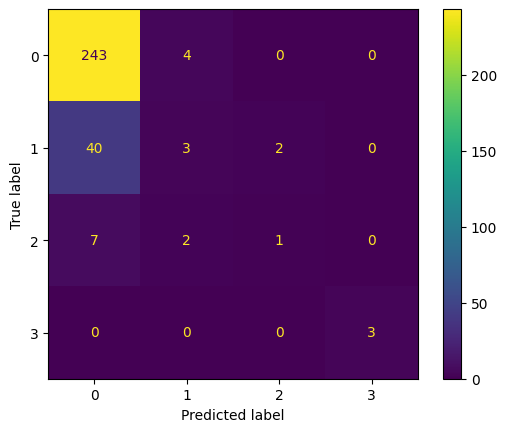

Improvement:  0.0


In [15]:
#@title Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

# from sklearn.model_selection import cross_val_score

def validate_KfoldCV(random_grid, Grid):
  rf = RandomForestClassifier()
  # Random search of parameters, using 3 fold cross validation, search across 20 different combinations, and use all available cores
  if (Grid == True):
    rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 5, verbose = 3, n_jobs = -1, scoring = "accuracy")
  else:
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose = 3, random_state=42, n_jobs = -1, scoring = "accuracy")
  rf_random.fit(x_train_balanced, y_train_balanced)

  print(rf_random.best_params_)
  rf_random.best_score_

  y_ranFor_pred = ranFor_model_train()
  evaluate_Model(y_ranFor_pred)

  y_RanFor_pred = ranFor_model_train(rf_random.best_estimator_)
  evaluate_Model(y_RanFor_pred)

  print("Improvement: ", accuracy_score(y_test, y_RanFor_pred) - accuracy_score(y_test, y_ranFor_pred))

  return rf_random.best_estimator_

new_random_grid = {'n_estimators': [700, 800, 900],
               'max_features': ['log2'],
               'min_samples_split': [5, 6, 7],
               'min_samples_leaf': [0, 1, 2],
               'class_weight': ['balanced_subsample'],
               'criterion': ['log_loss'],
               'bootstrap': [True]}

model_validated = validate_KfoldCV(new_random_grid, Grid = True)

In [16]:
# #@title Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

# # Step 1. Import Relevant functions from Libraries
# from sklearn.ensemble import BaggingClassifier

# # Step 2. Add ensembling methods on top of Base models

# # Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
# bagging = BaggingClassifier(estimator=rf_random.best_estimator_, n_estimators=10, random_state=42)

# # Train the bagging classifier on the training data
# bagging.fit(x_train_balanced, y_train_balanced)

# # Predict the labels of the test data
# y_bagg_pred = bagging.predict(x_test)

# # Compute the accuracy score of the bagging classifier
# evaluate_Model(y_bagg_pred)

# the reason of commenting them out is because the accuracy drops after using it



---



#### **Step 6. Interpretation**
In this step, you will interpret the results of the best model and explain its predictions using some methods such as SHAP values, LIME, etc. You will also discuss the limitations and implications of the model and provide some recommendations for future work.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



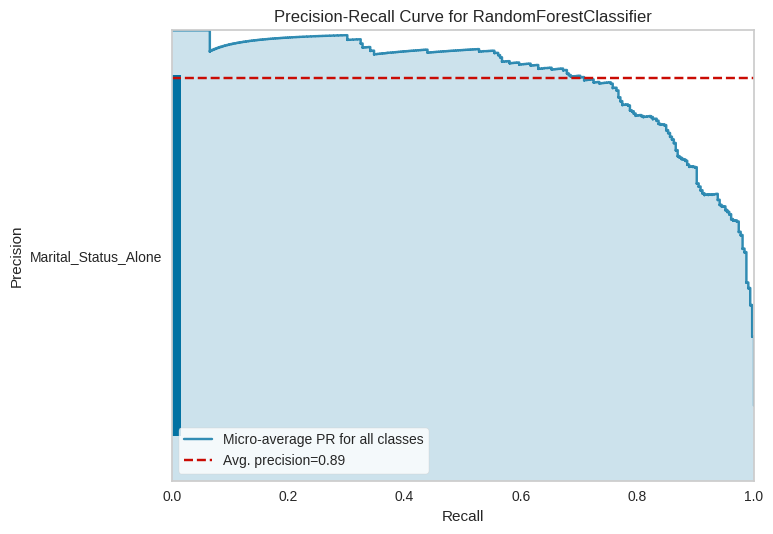

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

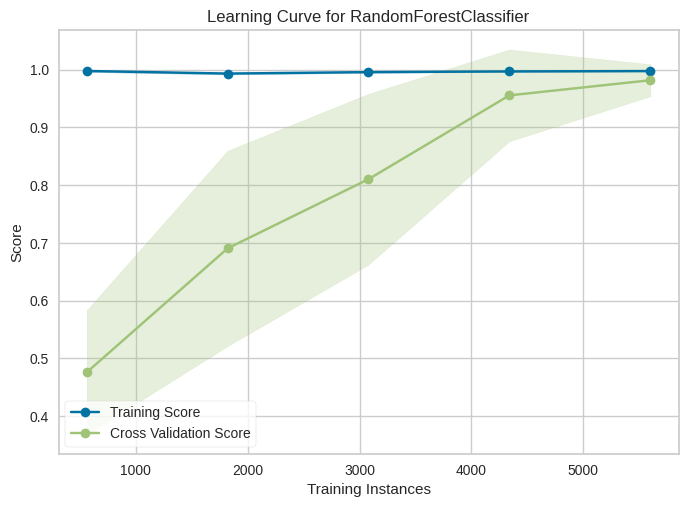

In [17]:
#@title Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

# Step 1. Import Graph Plotting Libraries (if any)
# ...
# from pdpbox import pdp, get_dataset, info_plots

from yellowbrick.model_selection import FeatureImportances

FI_visualizer = FeatureImportances(model_validated, relative = True)
FI_visualizer.fit(x_train_balanced, y_train_balanced)
FI_visualizer.show("Feature_Importances_Plot.png")

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(model_validated)
viz.fit(x_train_balanced, y_train_balanced)
viz.score(x_test, y_test)
viz.show()

from yellowbrick.model_selection import LearningCurve

LC_visualizer = LearningCurve(model_validated, n_jobs = -1, cv = 5, scoring = "accuracy")
LC_visualizer.fit(x_train_balanced, y_train_balanced)
LC_visualizer.show("Learning_Curve.png")


# plt.show()

#### **Step 7. Machine Learning Dashboard**
In this section of the assignment, you will showcase your findings and insights from your Machine Learning project by building an interactive and visually appealing dashboard.


Transform Graphs that you generated in
1. Part 1d - Exploratory Data Analysis
2. Part 4a - Model's Evaluation
3. Part 6 - Model's Insight Generation

into a web-based dashboard.

(For reference - Dashboard Example: https://explainerdashboard.readthedocs.io/en/latest/)



In [18]:
!pip install dash

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

SyntaxError: ignored

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


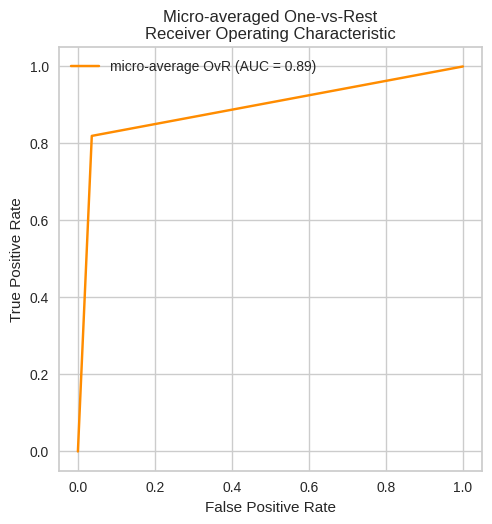

In [37]:
# Calculate the FPR, TPR, and threshold values for your test predictions
y_pred = model_validated.predict(x_test)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_pred = label_binarizer.transform(y_pred)
y_onehot_test.shape  # (n_samples, n_classes)
print(y_onehot_pred)

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_onehot_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()